In [167]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import os
%matplotlib inline

In [224]:
class logread:
    def __init__(self):
        self.logdir="logs"
        self.delimiter="\t"
        self.lognames=self.read_all_log_folders()
        self.detaildata=[]
        self.traindata=[]
        self.fulltraineddata=[]
        self.accuracydata=[]
        for folder in self.lognames:
            if os.path.exists(self.logdir+"/"+folder+"/"+"details.log"):
                self.detaildata.append(self.read_linebyline(folder,"details.log"))
            else:
                self.detaildata.append(None)
            self.traindata.append(self.read_train(folder))
            if os.path.exists(self.logdir+"/"+folder+"/"+"full_trained.log"):
                self.fulltraineddata.append(self.read_linebyline(folder,"full_trained.log"))
            else:
                self.fulltraineddata.append(None)
            if os.path.exists(self.logdir+"/"+folder+"/"+"accuracy.log"):
                self.accuracydata.append(self.read_linebyline(folder,"accuracy.log"))
            else:
                self.accuracydata.append(None)
            
    def read_all_log_folders(self):
        lista=[]
        for filename in os.listdir(os.getcwd()+"/"+self.logdir):
            lista.append(filename)
        return lista
    def read_train(self,folder):
        train_logs=[]
        with open(self.logdir+"/"+folder+"/"+"train.log") as f:
            for line in f:
                if "START" in line:
                    temptrain=[]
                elif "STOP" in line:
                    train_logs.append(temptrain)
                else: 
                    temptrain.append(line.rstrip('\n').split(self.delimiter))
        return train_logs
    def read_linebyline(self,folder,logname):
        logs=[]
        if os.path.exists(self.logdir+"/"+folder+"/"+logname):
            with open(self.logdir+"/"+folder+"/"+logname) as f:
                for line in f:
                    logs.append(line.rstrip('\n').split(self.delimiter))
        else:
            print("No logfile found")
        return logs
    
    def plot_fulltrains(self):
        for i in range(len(self.detaildata)):
            print(self.detaildata[i])
            lenlist=[]
            trainlist=[]
            testlist=[]
            sumlist=[]
            if self.fulltraineddata[i]!=None:
                for j in range(len(self.fulltraineddata[i])):
                    lenlist.append(len(self.fulltraineddata[i][j])-5)
                    trainlist.append(float(self.fulltraineddata[i][j][1]))
                    testlist.append(float(self.fulltraineddata[i][j][3]))
                    sumlist.append(sum(list(map(int, self.fulltraineddata[i][j][5:]))))
                plt.plot(lenlist,trainlist,'ro',lenlist,testlist,'g^')

                plt.show()
    def plot_accuracy(self):
        for i in range(len(self.detaildata)):
            
            lenlist=[]
            trainlist=[]
            testlist=[]
            sumlist=[]
            wordlist=[]
            max_accuracy=0
            if self.accuracydata[i]!=None:
                print(self.detaildata[i])
                for j in range(len(self.accuracydata[i])):
                    lenlist.append(len(self.accuracydata[i][j])-6)
                    trainlist.append(float(self.accuracydata[i][j][2]))
                    testlist.append(float(self.accuracydata[i][j][4]))
                    wordlist.append(float(self.accuracydata[i][j][5]))
                    sumlist.append(sum(list(map(int, self.accuracydata[i][j][6:]))))
                    if testlist[-1]>max_accuracy:
                        max_accuracy=testlist[-1]
                        best_config=list(map(int, self.accuracydata[i][j][6:]))
                plt.plot(sumlist,trainlist,'ro',sumlist,testlist,'g^',sumlist,wordlist,'bx')
                print("Max test accuracy:",max_accuracy,
                     "\nMax train accuracy:",max(trainlist),
                     "\nWith config: ",best_config)
                plt.show()
    

[['Language', 'Hun'], ['Wordcount', '75191'], ['Unique words', '25545'], ['Population size', '40'], ['Encoding dim', '80'], ['Encoder type', 'Accuracy_tracker_80'], ['nonlinear', '<function relu at 0x7fc19fde51e0>'], ['population_size', '40']]
Max test accuracy: 0.8198949398231266 
Max train accuracy: 0.8166644500598483 
With config:  [80, 249, 278, 360]


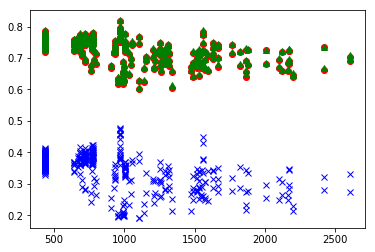

[['Language', 'Hun'], ['Wordcount', '75191'], ['Unique words', '25545'], ['Population size', '40'], ['Encoding dim', '100'], ['Encoder type', 'Accuracy_tracker_40'], ['nonlinear', '<function relu at 0x7f7920ca5268>'], ['population_size', '40']]
Max test accuracy: 0.801117095551566 
Max train accuracy: 0.7967931240856497 
With config:  [100, 360]


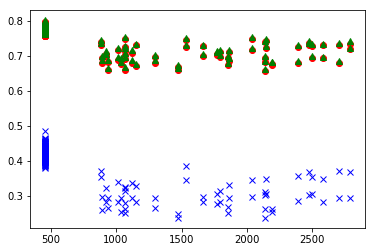

[['Language', 'Hun'], ['Wordcount', '748072'], ['Unique words', '135416'], ['Population size', '40'], ['Encoding dim', '40'], ['Encoder type', 'Accuracy_tracker_40'], ['nonlinear', '<function relu at 0x7f50dc226268>'], ['population_size', '40']]
Max test accuracy: 0.7485833639675167 
Max train accuracy: 0.75220842934413 
With config:  [189, 40, 255, 360]


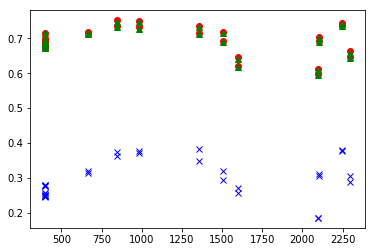

[['Language', 'Hun'], ['Wordcount', '75191'], ['Unique words', '25545'], ['Population size', '40'], ['Encoding dim', '80'], ['Encoder type', 'Accuracy_tracker_40'], ['nonlinear', '<function relu at 0x7f50539241e0>'], ['population_size', '40']]
Max test accuracy: 0.7887027062969613 
Max train accuracy: 0.7850329166112515 
With config:  [40, 148, 360, 250, 324, 360]


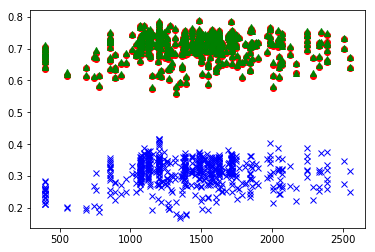

In [230]:
log=logread()

log.plot_accuracy()